In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['axes.unicode_minus'] = False
import warnings

warnings.filterwarnings("ignore")

In [2]:
from sklearn.preprocessing import StandardScaler
import pandas as pd


file_path = r"C:\Users\30393\Desktop\data.xlsx"
df = pd.read_excel(file_path, sheet_name='Dec_TPA')


numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns


scaler = StandardScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])
means = scaler.mean_
stds = scaler.scale_


stats_df = pd.DataFrame({
    'Column': numerical_columns,
    'Mean': means,
    'Std': stds
})


print(stats_df)


output_file_path = r"C:\Users\30393\Desktop\Dec_TPA_scaler.xlsx"
df.to_excel(output_file_path, index=False)

       Column        Mean        Std
0        Year    2.031746   0.860077
1           R  105.865079  11.214553
2           G  126.494709   8.700178
3           B   41.941799  11.010063
4          NR    0.385434   0.024532
5          NG    0.461379   0.017396
6          NB    0.153187   0.039817
7          GB    3.262799   1.054993
8          RB    2.743929   0.940980
9          GR    1.199568   0.047431
10         BI   98.550054   7.159659
11        BIM   13.515767   0.437915
12        SCI   -0.090303   0.019830
13        GLI    0.262471   0.032638
14         HI    0.480970   0.165976
15      NGRDI    0.090303   0.019830
16      NDGBI    0.505661   0.109835
17      NDRBI    0.435004   0.130067
18          I  274.301587  17.605887
19          S    0.540439   0.119451
20       VARI    0.112274   0.029832
21        HUE   -1.566765   0.000842
22       HUE2   -1.567782   0.000239
23        BGI    0.335554   0.099332
24          L   91.433862   5.868629
25       GRAY  110.687418   7.919085
2

In [4]:
df = pd.read_excel("C:\\Users\\30393\\Desktop\\Dec_TPA_scaler.xlsx")
from sklearn.model_selection import train_test_split

X = df.drop(['Year','Number', 'TPA(mg/g)'], axis=1)
y = df['TPA(mg/g)']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import numpy as np


rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)


feature_importance = rf_model.feature_importances_
print("Feature Importance:", feature_importance)  


feature_importance_df = pd.DataFrame({                
'Feature': X.columns,                
'Importance': feature_importance
})


feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)


top_sixteen_features_df = feature_importance_df.head(16)

print(top_sixteen_features_df)

Feature Importance: [0.04796828 0.01974048 0.00303201 0.06788253 0.00638938 0.00957954
 0.00122311 0.02381557 0.00137305 0.00617293 0.0095144  0.00218404
 0.00469218 0.21570669 0.00304816 0.00241258 0.00878159 0.00378749
 0.01616303 0.03191571 0.00669794 0.00961478 0.00220179 0.00530356
 0.01800783 0.02463178 0.00840322 0.12170751 0.01888248 0.07022259
 0.00268748 0.0660561  0.00490937 0.11178709 0.01473931 0.00961286
 0.01042394 0.00447449 0.00425312]
   Feature  Importance
13      HI    0.215707
27     SHP    0.121708
33   GminB    0.111787
29   RminB    0.070223
3       NR    0.067883
31  RplusG    0.066056
0        R    0.047968
19    VARI    0.031916
25    GLAI    0.024632
7       RB    0.023816
1        G    0.019740
28      RI    0.018882
24    GRAY    0.018008
18       S    0.016163
34  BplusG    0.014739
36      a*    0.010424


In [6]:

output_file = 'top_sixteen_features_Dec_TPA.xlsx'

try:
    
    top_sixteen_features_df.to_excel(output_file, index=False)
    print(f"\nThe first 16 important features have been successfully saved {output_file}")
    
except Exception as e:
    
    print(f"\nSave Failed: {e}")


The first 16 important features have been successfully saved top_sixteen_features_Dec_TPA.xlsx


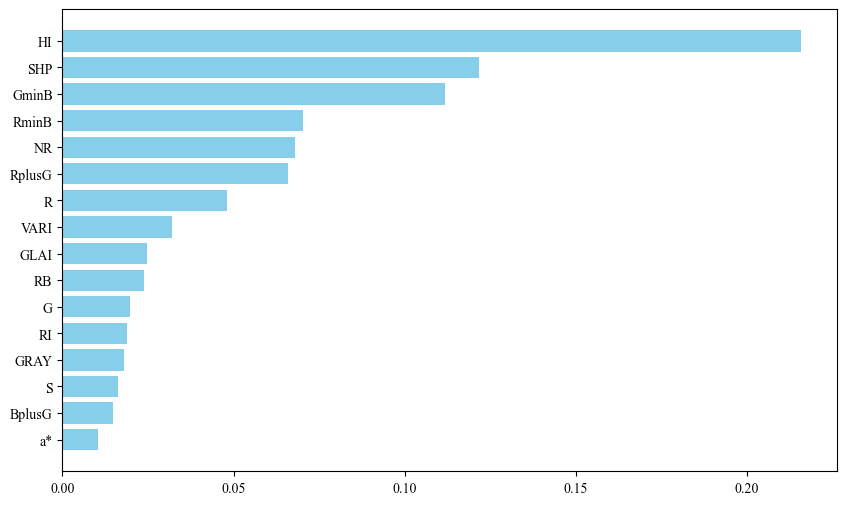

In [7]:
import os
plt.figure(figsize=(10, 6))
plt.barh(top_sixteen_features_df['Feature'], top_sixteen_features_df['Importance'], color='skyblue')
plt.gca().invert_yaxis()  
plt.savefig('Dec_TPA_a.jpg', dpi=600, bbox_inches='tight')
plt.show()

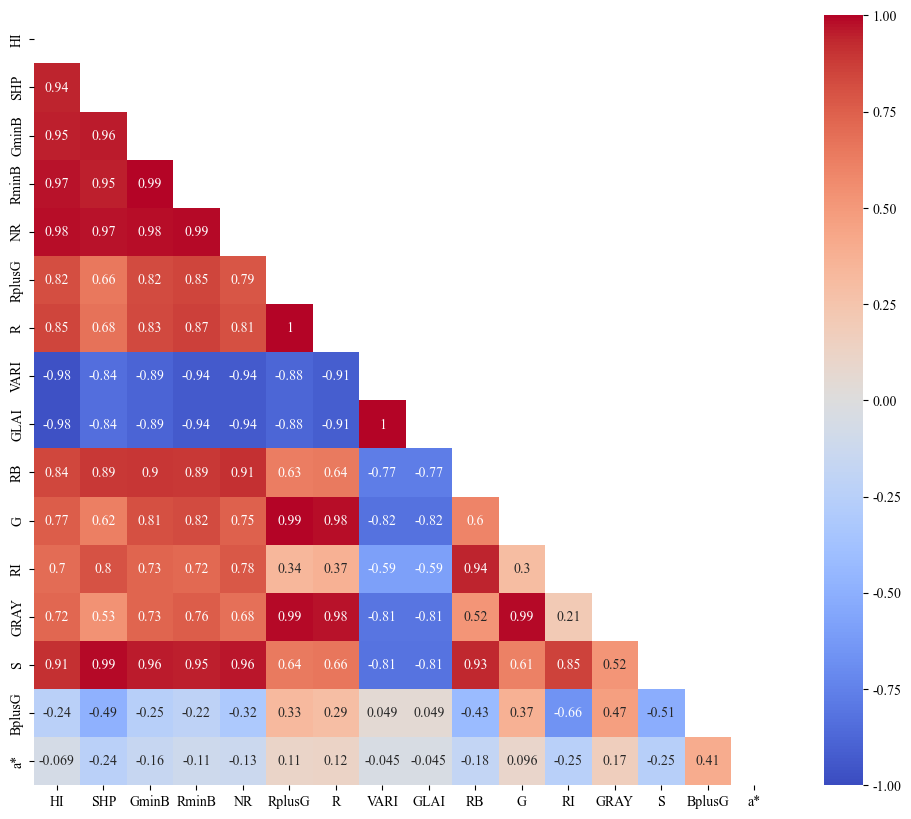

In [8]:
import seaborn as sns

correlation_matrix = X.corr(method='pearson')
top_sixteen_features = top_sixteen_features_df['Feature']



final_corr_matrix = correlation_matrix.loc[top_sixteen_features, top_sixteen_features]



plt.figure(figsize=(12, 10))
mask = np.triu(np.ones_like(final_corr_matrix, dtype=bool))
sns.heatmap(final_corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, mask=mask)

plt.savefig('Dec_TPA_b.jpg', dpi=600, bbox_inches='tight')

plt.show()


In [9]:

import pandas as pd

def select_top_features_by_correlation(corr_matrix, features, feature_importance_df, threshold=0.95):
    
    high_corr_pairs = []
    for i in range(len(features)):
        for j in range(i + 1, len(features)):
            if abs(corr_matrix.loc[features[i], features[j]]) > threshold:
                high_corr_pairs.append((features[i], features[j]))

    
    features_to_remove = set()

    
    for pair in high_corr_pairs:
        
        importance_1 = feature_importance_df[feature_importance_df['Feature'] == pair[0]]['Importance'].values[0]
        importance_2 = feature_importance_df[feature_importance_df['Feature'] == pair[1]]['Importance'].values[0]

        
        if importance_1 < importance_2:
            features_to_remove.add(pair[0])
        else:
            features_to_remove.add(pair[1])

    
    filtered_features = [feature for feature in features if feature not in features_to_remove]
    return filtered_features


sorted_features = list(top_sixteen_features_df['Feature'][:16])


final_features = select_top_features_by_correlation(correlation_matrix, sorted_features, top_sixteen_features_df, threshold=0.95)
print("Final Retained Features：", final_features)

Final Retained Features： ['HI', 'SHP', 'RplusG', 'RB', 'RI', 'BplusG', 'a*']


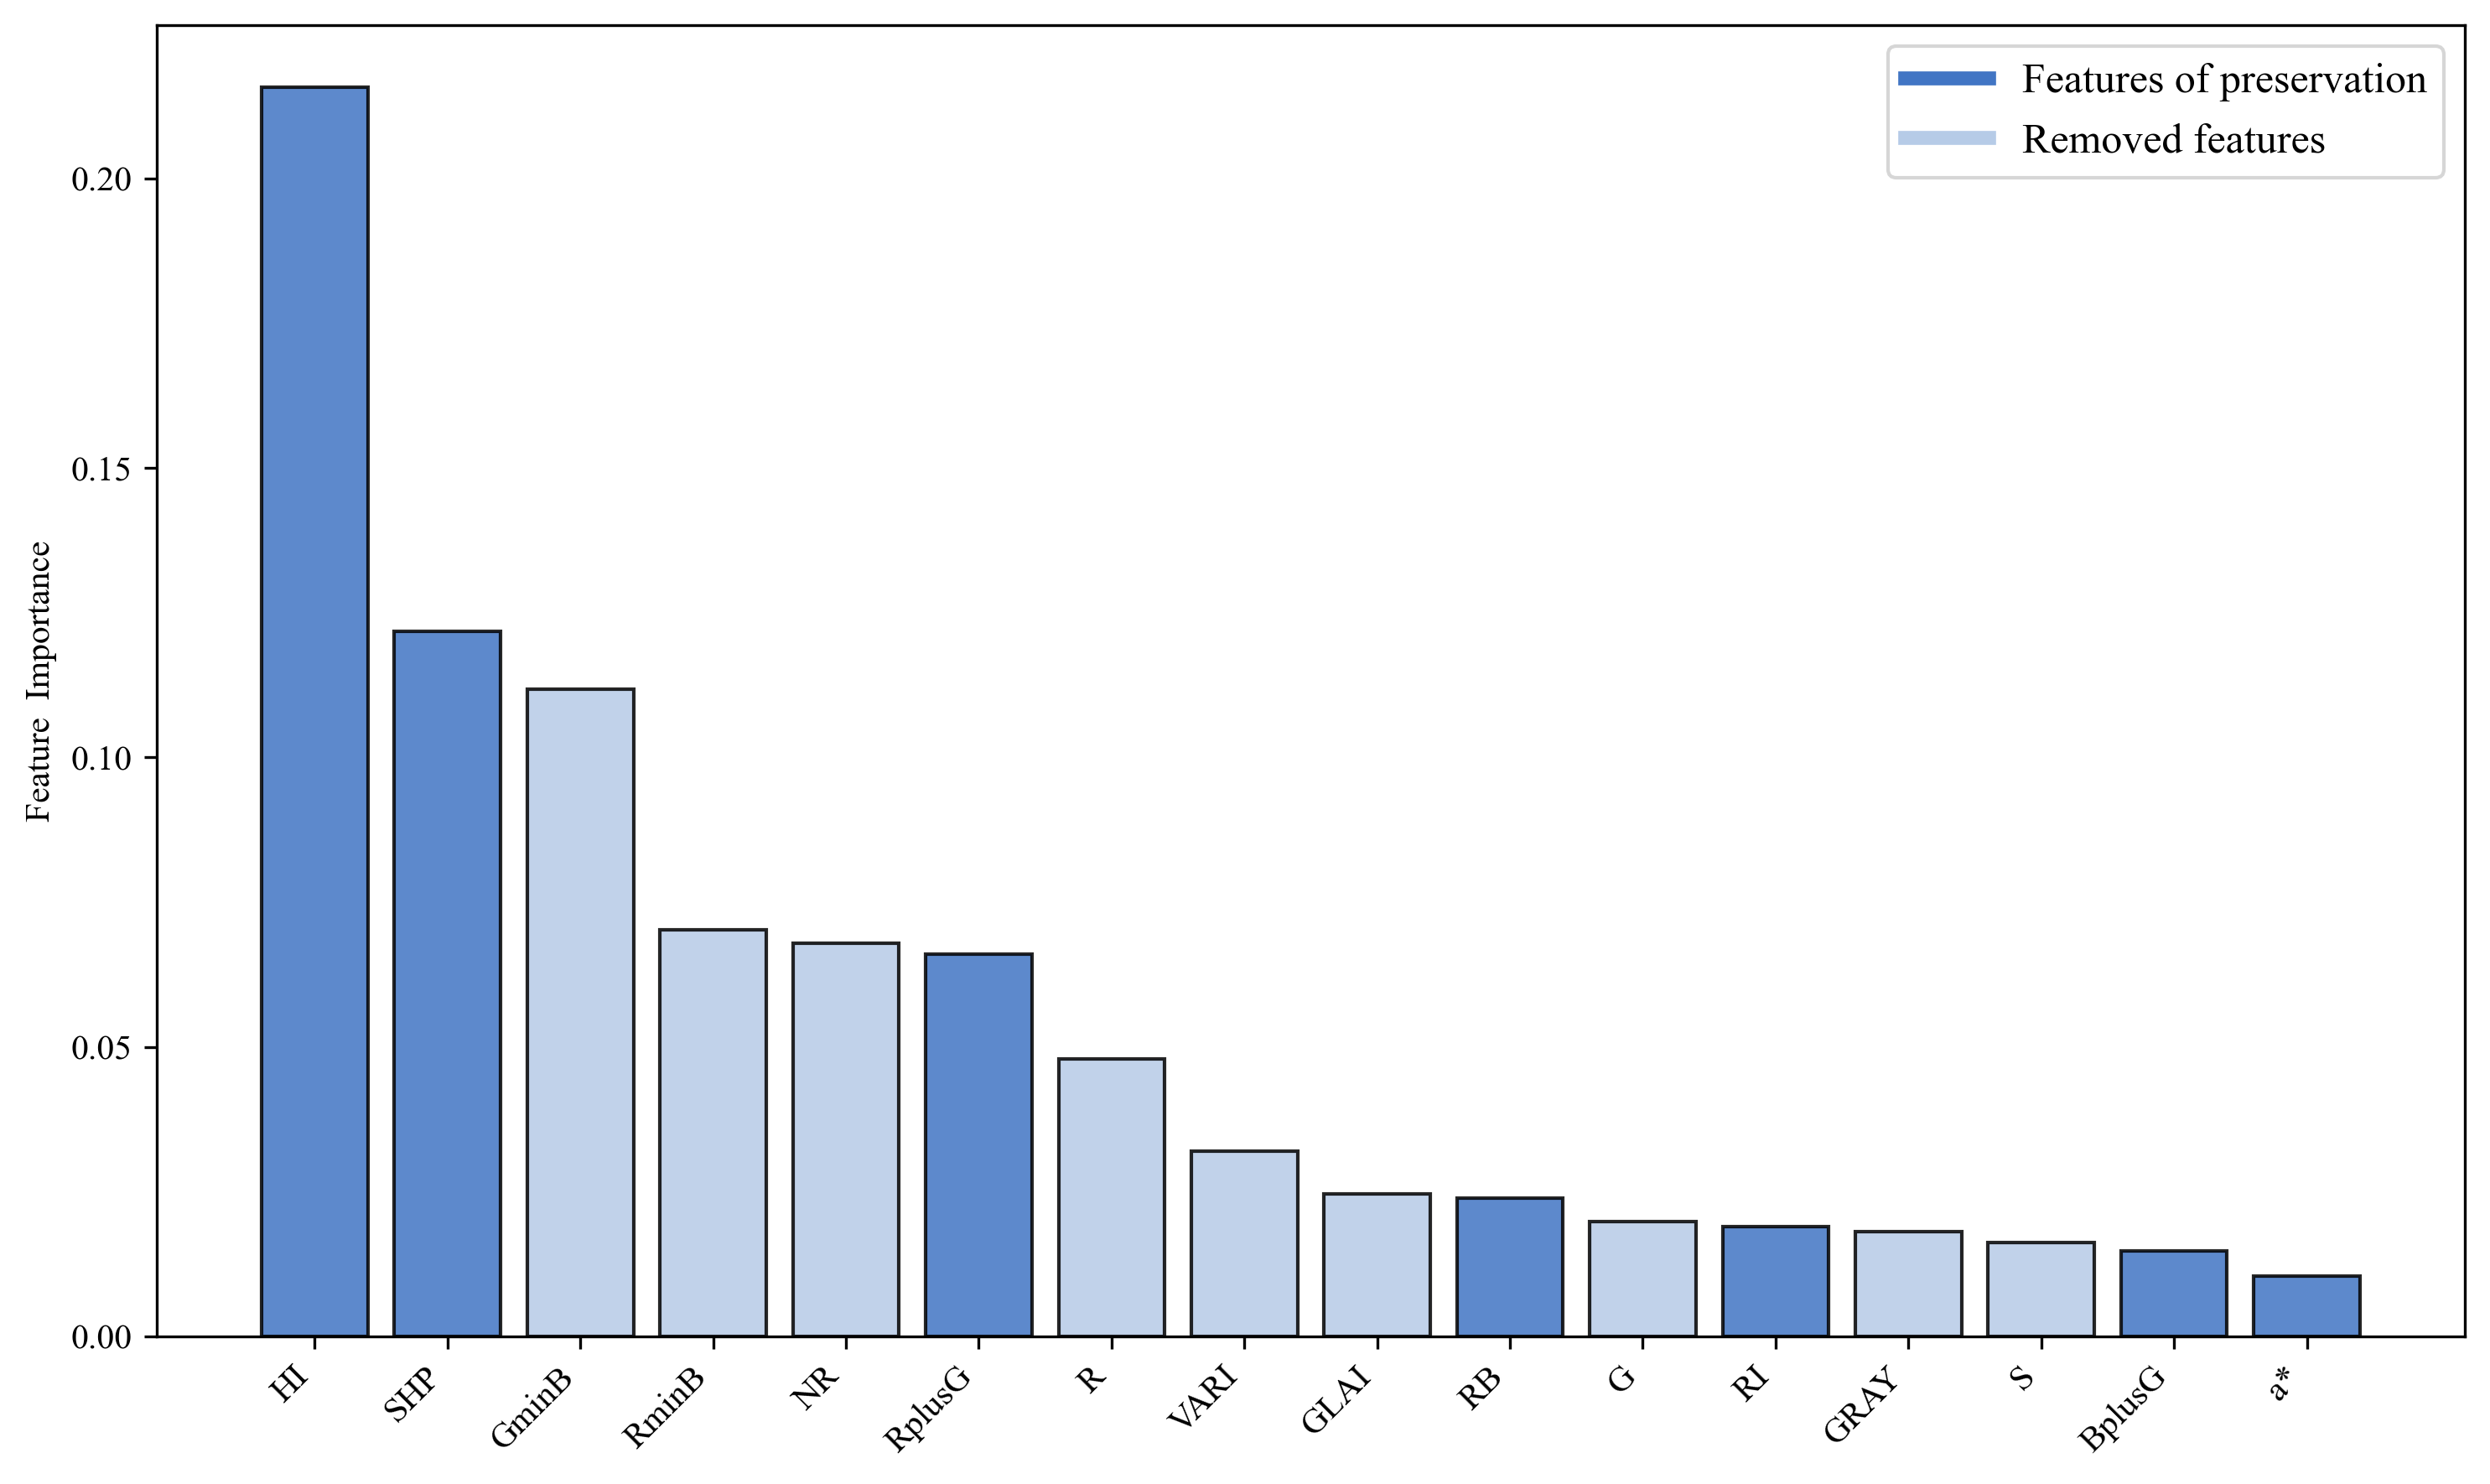

In [10]:

import matplotlib.pyplot as plt
from matplotlib.offsetbox import AnnotationBbox, TextArea
import pandas as pd

feature_names = top_sixteen_features_df['Feature'].tolist()  
feature_importances = feature_importance_df.iloc[0:16]['Importance']  
selected_features = final_features  


colors = [(65 / 255, 117 / 255, 196 / 255) if feature in selected_features else (182 / 255, 203 / 255, 231 / 255) 
          for feature in feature_names]


plt.figure(figsize=(10, 6), dpi=300)
bars = plt.bar(feature_names, feature_importances, color=colors, edgecolor='black', alpha=0.85)


red_patch = plt.Line2D([0], [0], color=(65 / 255, 117 / 255, 196 / 255), lw=4, label='Features of preservation')  
blue_patch = plt.Line2D([0], [0], color=(182 / 255, 203 / 255, 231 / 255), lw=4, label='Removed features')  
plt.legend(handles=[red_patch, blue_patch], loc='upper right', fontsize=12)

plt.ylabel('Feature  Importance', fontsize=10)
plt.xticks(rotation=45, fontsize=10, ha='right')
plt.tight_layout()
plt.savefig('Dec_TPA_c.jpg', dpi=600)
plt.show()

In [11]:
#RF



In [12]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score  
from itertools import combinations


all_combinations = []
for r in range(1, len(final_features) + 1):
    combinations_list = list(combinations(final_features, r))
    all_combinations.extend(combinations_list)


results = []

for combination in all_combinations:
    selected_features = list(combination)
    X_train_subset = X_train[selected_features]
    X_test_subset = X_test[selected_features]
    
    
    rf_model = RandomForestRegressor(random_state=42)
    
    
    cv_scores = cross_val_score(
        estimator=rf_model,
        X=X_train_subset, 
        y=y_train,
        cv=5,              
        scoring='r2',      
        n_jobs=-1          
    )
    
    
    cv_mean_r2 = cv_scores.mean()
    
    
    results.append({                        
        'Features': selected_features,        
        'Num_Features': len(selected_features),        
        'CV Mean R^2': cv_mean_r2  
    })


results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by='CV Mean R^2', ascending=False).reset_index(drop=True)

print(results_df)

                              Features  Num_Features  CV Mean R^2
0                [HI, SHP, RplusG, RI]             4     0.842936
1    [HI, SHP, RplusG, RB, RI, BplusG]             6     0.842579
2        [HI, SHP, RplusG, RI, BplusG]             5     0.842344
3                    [HI, SHP, RplusG]             3     0.841557
4    [HI, SHP, RplusG, RI, BplusG, a*]             6     0.841337
..                                 ...           ...          ...
122                           [RplusG]             1     0.480896
123                               [RI]             1     0.452678
124                       [BplusG, a*]             2     0.191771
125                           [BplusG]             1    -0.155732
126                               [a*]             1    -0.423853

[127 rows x 3 columns]


best_combination is: ['HI', 'SHP', 'RplusG', 'RI']


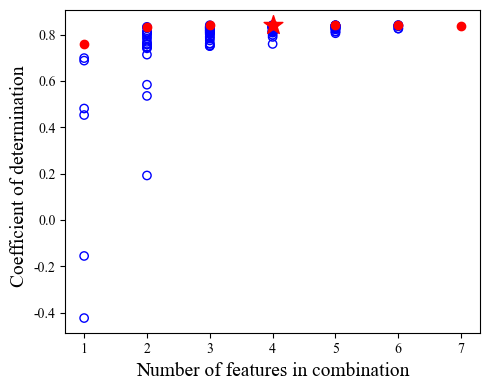

In [13]:

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

plt.figure(figsize=(5, 4))

num_features = results_df['Num_Features']
r2_scores = results_df['CV Mean R^2']

best_r2_per_num_features = results_df.groupby('Num_Features')['CV Mean R^2'].idxmax()

best_index = results_df['CV Mean R^2'].idxmax()


non_best_indices = [index for index in results_df.index if index not in best_r2_per_num_features.values]
best_indices = best_r2_per_num_features.values


non_best_num_features = num_features[non_best_indices]
non_best_r2_scores = r2_scores[non_best_indices]
plt.scatter(non_best_num_features, non_best_r2_scores, c='none', edgecolors='blue', marker='o')


best_num_features = num_features[best_indices]
best_r2_scores = r2_scores[best_indices]
plt.scatter(best_num_features, best_r2_scores, c='red', edgecolors='red', marker='o')


plt.scatter(num_features[best_index], r2_scores[best_index], marker='*', s=200, color='red')

best_index = results_df['CV Mean R^2'].idxmax()
plt.xticks(np.arange(1, len(final_features) + 1))

best_combination = results_df.loc[best_index, 'Features']
print("best_combination is:", best_combination)
plt.xlabel('Number of features in combination', fontsize=14)
plt.ylabel('Coefficient of determination  ', fontsize=14)
plt.tight_layout()
plt.savefig('Dec_TPA_d.jpg', dpi=600)
plt.show()

In [ ]:
#SVR





In [14]:
#svr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVR  
from sklearn.model_selection import cross_val_score
from itertools import combinations


all_combinations = []
for r in range(1, len(final_features) + 1):
    combinations_list = list(combinations(final_features, r))
    all_combinations.extend(combinations_list)


results = []

for combination in all_combinations:
    selected_features = list(combination)
    X_train_subset = X_train[selected_features]
    X_test_subset = X_test[selected_features]
    
    
    svr_model = SVR(kernel='rbf')  
    
    cv_scores = cross_val_score(
        estimator=svr_model,
        X=X_train_subset, 
        y=y_train,
        cv=5,              
        scoring='r2',      
        n_jobs=-1          
    )
    
    
    cv_mean_r2 = cv_scores.mean()
    
    
    results.append({                        
        'Features': selected_features,        
        'Num_Features': len(selected_features),        
        'CV Mean R^2': cv_mean_r2  
    })


results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by='CV Mean R^2', ascending=False).reset_index(drop=True)

print(results_df)

                              Features  Num_Features  CV Mean R^2
0                [HI, SHP, RplusG, RI]             4     0.861751
1            [HI, SHP, RB, RI, BplusG]             5     0.861399
2                     [HI, RplusG, RI]             3     0.861375
3    [HI, SHP, RplusG, RB, RI, BplusG]             6     0.860931
4                 [HI, RplusG, RB, RI]             4     0.860686
..                                 ...           ...          ...
122                           [RI, a*]             2     0.652600
123                               [RI]             1     0.651637
124                       [BplusG, a*]             2     0.296107
125                           [BplusG]             1     0.218282
126                               [a*]             1    -0.018095

[127 rows x 3 columns]


['HI', 'SHP', 'RplusG', 'RI']


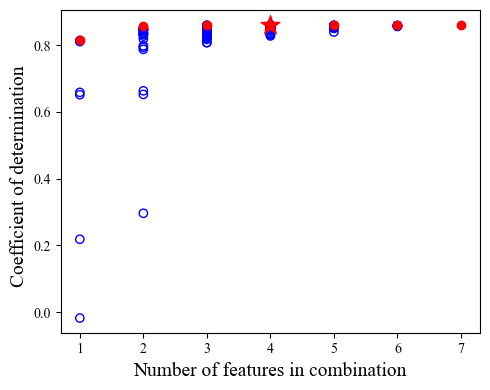

In [15]:

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

plt.figure(figsize=(5, 4))

num_features = results_df['Num_Features']
r2_scores = results_df['CV Mean R^2']

best_r2_per_num_features = results_df.groupby('Num_Features')['CV Mean R^2'].idxmax()

best_index = results_df['CV Mean R^2'].idxmax()


non_best_indices = [index for index in results_df.index if index not in best_r2_per_num_features.values]
best_indices = best_r2_per_num_features.values


non_best_num_features = num_features[non_best_indices]
non_best_r2_scores = r2_scores[non_best_indices]
plt.scatter(non_best_num_features, non_best_r2_scores, c='none', edgecolors='blue', marker='o')


best_num_features = num_features[best_indices]
best_r2_scores = r2_scores[best_indices]
plt.scatter(best_num_features, best_r2_scores, c='red', edgecolors='red', marker='o')


plt.scatter(num_features[best_index], r2_scores[best_index], marker='*', s=200, color='red')

best_index = results_df['CV Mean R^2'].idxmax()
plt.xticks(np.arange(1, len(final_features) + 1))

best_combination = results_df.loc[best_index, 'Features']
print(best_combination)
plt.xlabel('Number of features in combination', fontsize=14)
plt.ylabel('Coefficient of determination  ', fontsize=14)
plt.tight_layout()
plt.savefig('Dec_TPA_e.jpg', dpi=600)
plt.show()

In [ ]:
#mlp





In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor  
from sklearn.model_selection import cross_val_score
from itertools import combinations


all_combinations = []
for r in range(1, len(final_features) + 1):
    combinations_list = list(combinations(final_features, r))
    all_combinations.extend(combinations_list)


results = []

for combination in all_combinations:
    selected_features = list(combination)
    X_train_subset = X_train[selected_features]
    X_test_subset = X_test[selected_features]
    
   
    mlp_model = MLPRegressor(
        hidden_layer_sizes=(100,),  
        activation='relu',          
        solver='adam',              
        random_state=42,            
        max_iter=200,               
        early_stopping=True,        
        n_iter_no_change=10,        
        validation_fraction=0.1     
    )
    
    
    cv_scores = cross_val_score(
        estimator=mlp_model,
        X=X_train_subset,  
        y=y_train,
        cv=5,
        scoring='r2',
        n_jobs=-1
    )
    
   
    cv_mean_r2 = cv_scores.mean()
    
    
    results.append({                        
        'Features': selected_features,        
        'Num_Features': len(selected_features),        
        'CV Mean R^2': cv_mean_r2
    })


results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by='CV Mean R^2', ascending=False).reset_index(drop=True)

print(results_df)

                     Features  Num_Features  CV Mean R^2
0               [SHP, RplusG]             2     0.837024
1    [HI, RplusG, RB, RI, a*]             5     0.831338
2                   [HI, SHP]             2     0.826501
3                    [HI, RI]             2     0.823690
4                [HI, RplusG]             2     0.820646
..                        ...           ...          ...
122          [RI, BplusG, a*]             3     0.471130
123                      [RI]             1     0.413731
124              [BplusG, a*]             2     0.219890
125                  [BplusG]             1     0.213905
126                      [a*]             1    -0.075709

[127 rows x 3 columns]


best_combination is: ['SHP', 'RplusG']


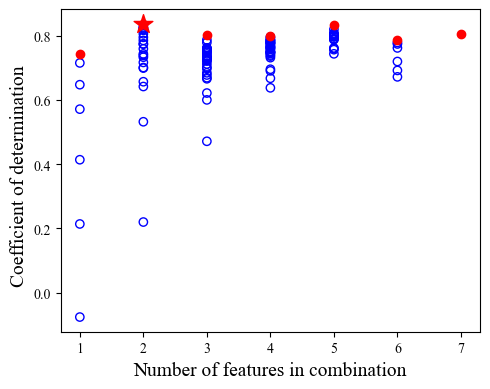

In [17]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

plt.figure(figsize=(5, 4))
num_features = results_df['Num_Features']
r2_scores = results_df['CV Mean R^2']
best_r2_per_num_features = results_df.groupby('Num_Features')['CV Mean R^2'].idxmax()
best_index = results_df['CV Mean R^2'].idxmax()

non_best_indices = [index for index in results_df.index if index not in best_r2_per_num_features.values]
best_indices = best_r2_per_num_features.values

non_best_num_features = num_features[non_best_indices]
non_best_r2_scores = r2_scores[non_best_indices]
plt.scatter(non_best_num_features, non_best_r2_scores, c='none', edgecolors='blue', marker='o')

best_num_features = num_features[best_indices]
best_r2_scores = r2_scores[best_indices]
plt.scatter(best_num_features, best_r2_scores, c='red', edgecolors='red', marker='o')

plt.scatter(num_features[best_index], r2_scores[best_index], marker='*', s=200, color='red')

best_index = results_df['CV Mean R^2'].idxmax()
plt.xticks(np.arange(1, len(final_features) + 1))

best_combination = results_df.loc[best_index, 'Features']
print("best_combination is:", best_combination)
plt.xlabel('Number of features in combination', fontsize=14)
plt.ylabel('Coefficient of determination  ', fontsize=14)
plt.tight_layout()
plt.savefig('Dec_TPA_f.jpg', dpi=600)
plt.show()

In [ ]:
#xgb




In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score
from itertools import combinations

all_combinations = []
for r in range(1, len(final_features) + 1):
    combinations_list = list(combinations(final_features, r))
    all_combinations.extend(combinations_list)

results = []
for combination in all_combinations:
    selected_features = list(combination)
    X_train_subset = X_train[selected_features]
    X_test_subset = X_test[selected_features]
    
    xgb_model = XGBRegressor(
        objective='reg:squarederror',
        random_state=42,
        n_jobs=-1
    )
    
    cv_scores = cross_val_score(
        estimator=xgb_model,
        X=X_train_subset,
        y=y_train,
        cv=5,
        scoring='r2',
        n_jobs=-1
    )
    
    cv_mean_r2 = cv_scores.mean()
    
    results.append({
        'Features': selected_features,
        'Num_Features': len(selected_features),
        'CV Mean R^2': cv_mean_r2
    })

results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by='CV Mean R^2', ascending=False).reset_index(drop=True)

print(results_df)

                         Features  Num_Features  CV Mean R^2
0            [HI, RplusG, RI, a*]             4     0.838247
1        [HI, RplusG, RI, BplusG]             4     0.829426
2                [HI, RplusG, a*]             3     0.828208
3                [HI, RplusG, RI]             3     0.827327
4    [HI, RplusG, RI, BplusG, a*]             5     0.825374
..                            ...           ...          ...
122                      [RplusG]             1     0.377341
123                          [RI]             1     0.335531
124                  [BplusG, a*]             2    -0.048158
125                      [BplusG]             1    -0.378356
126                          [a*]             1    -0.680193

[127 rows x 3 columns]


best_combination is: ['HI', 'RplusG', 'RI', 'a*']


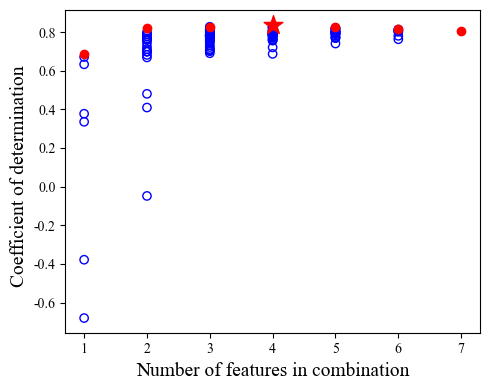

In [19]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

plt.figure(figsize=(5, 4))
num_features = results_df['Num_Features']
r2_scores = results_df['CV Mean R^2']
best_r2_per_num_features = results_df.groupby('Num_Features')['CV Mean R^2'].idxmax()
best_index = results_df['CV Mean R^2'].idxmax()

non_best_indices = [index for index in results_df.index if index not in best_r2_per_num_features.values]
best_indices = best_r2_per_num_features.values

non_best_num_features = num_features[non_best_indices]
non_best_r2_scores = r2_scores[non_best_indices]
plt.scatter(non_best_num_features, non_best_r2_scores, c='none', edgecolors='blue', marker='o')

best_num_features = num_features[best_indices]
best_r2_scores = r2_scores[best_indices]
plt.scatter(best_num_features, best_r2_scores, c='red', edgecolors='red', marker='o')

plt.scatter(num_features[best_index], r2_scores[best_index], marker='*', s=200, color='red')

best_index = results_df['CV Mean R^2'].idxmax()
plt.xticks(np.arange(1, len(final_features) + 1))

best_combination = results_df.loc[best_index, 'Features']
print("best_combination is:", best_combination)
plt.xlabel('Number of features in combination', fontsize=14)
plt.ylabel('Coefficient of determination  ', fontsize=14)
plt.tight_layout()
plt.savefig('Dec_TPA_g.jpg', dpi=600)
plt.show()

In [ ]:
#lgb



In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import lightgbm as lgb
from sklearn.model_selection import cross_val_score
from itertools import combinations

all_combinations = []
for r in range(1, len(final_features) + 1):
    combinations_list = list(combinations(final_features, r))
    all_combinations.extend(combinations_list)

results = []
for combination in all_combinations:
    selected_features = list(combination)
    X_train_subset = X_train[selected_features]
    X_test_subset = X_test[selected_features]
    
    lgb_model = lgb.LGBMRegressor(
        objective='regression',
        random_state=42,
        n_jobs=-1
    )
    
    cv_scores = cross_val_score(
        estimator=lgb_model,
        X=X_train_subset,
        y=y_train,
        cv=5,
        scoring='r2',
        n_jobs=-1
    )
    
    cv_mean_r2 = cv_scores.mean()
    
    results.append({
        'Features': selected_features,
        'Num_Features': len(selected_features),
        'CV Mean R^2': cv_mean_r2
    })

results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by='CV Mean R^2', ascending=False).reset_index(drop=True)

print(results_df)

                              Features  Num_Features  CV Mean R^2
0                [HI, SHP, RplusG, RI]             4     0.841704
1                     [HI, RplusG, RI]             3     0.839164
2    [HI, SHP, RplusG, RB, RI, BplusG]             6     0.838436
3             [HI, RplusG, RI, BplusG]             4     0.838025
4            [HI, SHP, RplusG, RB, RI]             5     0.837804
..                                 ...           ...          ...
122                               [RI]             1     0.604618
123                           [RI, a*]             2     0.586649
124                       [BplusG, a*]             2     0.252432
125                           [BplusG]             1     0.096995
126                               [a*]             1    -0.020163

[127 rows x 3 columns]


best_combination is: ['HI', 'SHP', 'RplusG', 'RI']


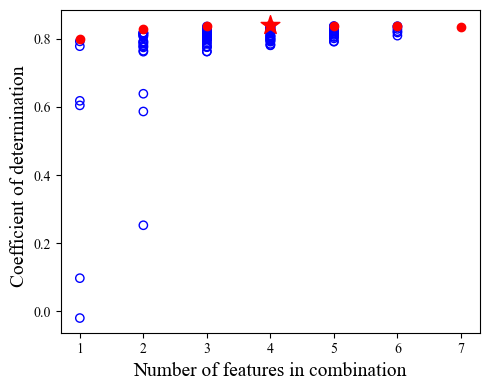

In [21]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

plt.figure(figsize=(5, 4))
num_features = results_df['Num_Features']
r2_scores = results_df['CV Mean R^2']
best_r2_per_num_features = results_df.groupby('Num_Features')['CV Mean R^2'].idxmax()
best_index = results_df['CV Mean R^2'].idxmax()

non_best_indices = [index for index in results_df.index if index not in best_r2_per_num_features.values]
best_indices = best_r2_per_num_features.values

non_best_num_features = num_features[non_best_indices]
non_best_r2_scores = r2_scores[non_best_indices]
plt.scatter(non_best_num_features, non_best_r2_scores, c='none', edgecolors='blue', marker='o')

best_num_features = num_features[best_indices]
best_r2_scores = r2_scores[best_indices]
plt.scatter(best_num_features, best_r2_scores, c='red', edgecolors='red', marker='o')

plt.scatter(num_features[best_index], r2_scores[best_index], marker='*', s=200, color='red')

best_index = results_df['CV Mean R^2'].idxmax()
plt.xticks(np.arange(1, len(final_features) + 1))

best_combination = results_df.loc[best_index, 'Features']
print("best_combination is:", best_combination)
plt.xlabel('Number of features in combination', fontsize=14)
plt.ylabel('Coefficient of determination  ', fontsize=14)
plt.tight_layout()
plt.savefig('Dec_TPA_h.jpg', dpi=600)
plt.show()

In [ ]:
#




#

In [22]:
#RF
import pandas as pd
import numpy as np
from sklearn.svm import SVR
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import warnings

warnings.filterwarnings('ignore')


df = pd.read_excel("C:\\Users\\30393\\Desktop\\Dec_TPA_scaler.xlsx")

X = df[['HI', 'SHP', 'RplusG', 'RI']]
y = df['TPA(mg/g)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model = RandomForestRegressor(random_state=42)  


kf = KFold(n_splits=5, shuffle=False)

r2_scores = cross_val_score(
    estimator=rf_model,
    X=X_train,
    y=y_train,
    cv=kf,
    scoring='r2'
)


mae_scores = cross_val_score(
    estimator=rf_model,
    X=X_train,
    y=y_train,
    cv=kf,
    scoring='neg_mean_absolute_error'  
)
mae_scores = -mae_scores  


mse_scores = cross_val_score(
    estimator=rf_model,
    X=X_train,
    y=y_train,
    cv=kf,
    scoring='neg_mean_squared_error'  
)
rmse_scores = np.sqrt(-mse_scores)  

mean_r2, std_r2 = np.mean(r2_scores), np.std(r2_scores)
mean_mae, std_mae = np.mean(mae_scores), np.std(mae_scores)
mean_rmse, std_rmse = np.mean(rmse_scores), np.std(rmse_scores)


print(f"R² ：{r2_scores.round(4)}, mean R² ± SD：{mean_r2.round(4)} ± {std_r2.round(4)}")
print(f"MAE ：{mae_scores.round(4)}, mean MAE ± SD：{mean_mae.round(4)} ± {std_mae.round(4)}")
print(f"RMSE ：{rmse_scores.round(4)}, mean RMSE ± SD：{mean_rmse.round(4)} ± {std_rmse.round(4)}")

R² ：[0.8139 0.8758 0.8888 0.8495 0.7867], mean R² ± SD：0.8429 ± 0.038
MAE ：[0.3244 0.2639 0.273  0.3283 0.3044], mean MAE ± SD：0.2988 ± 0.0262
RMSE ：[0.4391 0.3175 0.3245 0.4461 0.4551], mean RMSE ± SD：0.3965 ± 0.0619


In [23]:
import pandas as pd
import numpy as np
from sklearn.svm import SVR
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import warnings

warnings.filterwarnings('ignore')


df = pd.read_excel("C:\\Users\\30393\\Desktop\\Dec_TPA_scaler.xlsx")


selected_features = ['HI', 'SHP', 'RplusG', 'RI']
X = df[selected_features]
y = df['TPA(mg/g)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = SVR(kernel='rbf')  


kf = KFold(n_splits=5, shuffle=False)


r2_scores = cross_val_score(
    estimator=model,
    X=X_train,
    y=y_train,
    cv=kf,
    scoring='r2'
)


mae_scores = cross_val_score(
    estimator=model,
    X=X_train,
    y=y_train,
    cv=kf,
    scoring='neg_mean_absolute_error'  
)
mae_scores = -mae_scores  


mse_scores = cross_val_score(
    estimator=model,
    X=X_train,
    y=y_train,
    cv=kf,
    scoring='neg_mean_squared_error'  
)
rmse_scores = np.sqrt(-mse_scores)  


mean_r2, std_r2 = np.mean(r2_scores), np.std(r2_scores)
mean_mae, std_mae = np.mean(mae_scores), np.std(mae_scores)
mean_rmse, std_rmse = np.mean(rmse_scores), np.std(rmse_scores)


print(f"R² ：{r2_scores.round(4)}, mean R² ± SD：{mean_r2.round(4)} ± {std_r2.round(4)}")
print(f"MAE ：{mae_scores.round(4)}, mean MAE ± SD：{mean_mae.round(4)} ± {std_mae.round(4)}")
print(f"RMSE ：{rmse_scores.round(4)}, mean RMSE ± SD：{mean_rmse.round(4)} ± {std_rmse.round(4)}")

R² ：[0.848  0.8677 0.8947 0.8434 0.855 ], mean R² ± SD：0.8618 ± 0.0184
MAE ：[0.2877 0.2635 0.2616 0.3363 0.2541], mean MAE ± SD：0.2806 ± 0.03
RMSE ：[0.3969 0.3278 0.3158 0.455  0.3752], mean RMSE ± SD：0.3741 ± 0.0502


In [24]:
#mlp
import pandas as pd
import numpy as np
from sklearn.svm import SVR
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import warnings

warnings.filterwarnings('ignore')


df = pd.read_excel("C:\\Users\\30393\\Desktop\\Dec_TPA_scaler.xlsx")


selected_features = ['SHP', 'RplusG']
X = df[selected_features]
y = df['TPA(mg/g)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


mlp_model = MLPRegressor(
        hidden_layer_sizes=(100,),  
        activation='relu',          
        solver='adam',              
        random_state=42,           
        max_iter=200,              
        early_stopping=True,        
        n_iter_no_change=10,        
        validation_fraction=0.1     
    )


kf = KFold(n_splits=5, shuffle=False)


r2_scores = cross_val_score(
    estimator=mlp_model,
    X=X_train,
    y=y_train,
    cv=kf,
    scoring='r2'
)


mae_scores = cross_val_score(
    estimator=mlp_model,
    X=X_train,
    y=y_train,
    cv=kf,
    scoring='neg_mean_absolute_error'  
)
mae_scores = -mae_scores  


mse_scores = cross_val_score(
    estimator=mlp_model,
    X=X_train,
    y=y_train,
    cv=kf,
    scoring='neg_mean_squared_error'  
)
rmse_scores = np.sqrt(-mse_scores)  


mean_r2, std_r2 = np.mean(r2_scores), np.std(r2_scores)
mean_mae, std_mae = np.mean(mae_scores), np.std(mae_scores)
mean_rmse, std_rmse = np.mean(rmse_scores), np.std(rmse_scores)

print(f"R² ：{r2_scores.round(4)}, mean R² ± SD：{mean_r2.round(4)} ± {std_r2.round(4)}")
print(f"MAE ：{mae_scores.round(4)}, mean MAE ± SD：{mean_mae.round(4)} ± {std_mae.round(4)}")
print(f"RMSE ：{rmse_scores.round(4)}, mean RMSE ± SD：{mean_rmse.round(4)} ± {std_rmse.round(4)}")

R² ：[0.7763 0.8654 0.8815 0.8181 0.8438], mean R² ± SD：0.837 ± 0.0371
MAE ：[0.3948 0.2584 0.2751 0.362  0.2937], mean MAE ± SD：0.3168 ± 0.0525
RMSE ：[0.4814 0.3305 0.3349 0.4904 0.3894], mean RMSE ± SD：0.4053 ± 0.069


In [25]:
#xgb
import pandas as pd
import numpy as np
from sklearn.svm import SVR
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import warnings

warnings.filterwarnings('ignore')

df = pd.read_excel("C:\\Users\\30393\\Desktop\\Dec_TPA_scaler.xlsx")

selected_features = ['HI', 'RplusG', 'RI', 'a*']
X = df[selected_features]
y = df['TPA(mg/g)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

xgb_model = XGBRegressor(
        objective='reg:squarederror',
        random_state=42,
        n_jobs=-1
    )

kf = KFold(n_splits=5, shuffle=False)

r2_scores = cross_val_score(
    estimator=xgb_model,
    X=X_train,
    y=y_train,
    cv=kf,
    scoring='r2'
)

mae_scores = cross_val_score(
    estimator=xgb_model,
    X=X_train,
    y=y_train,
    cv=kf,
    scoring='neg_mean_absolute_error'
)
mae_scores = -mae_scores

mse_scores = cross_val_score(
    estimator=xgb_model,
    X=X_train,
    y=y_train,
    cv=kf,
    scoring='neg_mean_squared_error'
)
rmse_scores = np.sqrt(-mse_scores)

mean_r2, std_r2 = np.mean(r2_scores), np.std(r2_scores)
mean_mae, std_mae = np.mean(mae_scores), np.std(mae_scores)
mean_rmse, std_rmse = np.mean(rmse_scores), np.std(rmse_scores)

print(f"R² ：{r2_scores.round(4)}, mean R² ± SD：{mean_r2.round(4)} ± {std_r2.round(4)}")
print(f"MAE ：{mae_scores.round(4)}, mean MAE ± SD：{mean_mae.round(4)} ± {std_mae.round(4)}")
print(f"RMSE ：{rmse_scores.round(4)}, mean RMSE ± SD：{mean_rmse.round(4)} ± {std_rmse.round(4)}")

R² ：[0.7867 0.847  0.8767 0.8569 0.8239], mean R² ± SD：0.8382 ± 0.0309
MAE ：[0.3593 0.2981 0.2978 0.3179 0.2789], mean MAE ± SD：0.3104 ± 0.0274
RMSE ：[0.4701 0.3524 0.3416 0.4349 0.4135], mean RMSE ± SD：0.4025 ± 0.0489


In [26]:
#lgb
import pandas as pd
import numpy as np
from sklearn.svm import SVR
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import warnings

warnings.filterwarnings('ignore')

df = pd.read_excel("C:\\Users\\30393\\Desktop\\Dec_TPA_scaler.xlsx")

selected_features = ['HI', 'SHP', 'RplusG', 'RI']
X = df[selected_features]
y = df['TPA(mg/g)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lgb_model = lgb.LGBMRegressor(
        objective='regression',
        random_state=42,
        verbose=-1,
        n_jobs=-1
    )
    
kf = KFold(n_splits=5, shuffle=False)

r2_scores = cross_val_score(
    estimator=lgb_model,
    X=X_train,
    y=y_train,
    cv=kf,
    scoring='r2'
)

mae_scores = cross_val_score(
    estimator=lgb_model,
    X=X_train,
    y=y_train,
    cv=kf,
    scoring='neg_mean_absolute_error'
)
mae_scores = -mae_scores

mse_scores = cross_val_score(
    estimator=lgb_model,
    X=X_train,
    y=y_train,
    cv=kf,
    scoring='neg_mean_squared_error'
)
rmse_scores = np.sqrt(-mse_scores)

mean_r2, std_r2 = np.mean(r2_scores), np.std(r2_scores)
mean_mae, std_mae = np.mean(mae_scores), np.std(mae_scores)
mean_rmse, std_rmse = np.mean(rmse_scores), np.std(rmse_scores)

print(f"R² ：{r2_scores.round(4)}, mean R² ± SD：{mean_r2.round(4)} ± {std_r2.round(4)}")
print(f"MAE ：{mae_scores.round(4)}, mean MAE ± SD：{mean_mae.round(4)} ± {std_mae.round(4)}")
print(f"RMSE ：{rmse_scores.round(4)}, mean RMSE ± SD：{mean_rmse.round(4)} ± {std_rmse.round(4)}")

R² ：[0.7996 0.889  0.9191 0.8442 0.7565], mean R² ± SD：0.8417 ± 0.0588
MAE ：[0.312  0.2518 0.2226 0.3334 0.2928], mean MAE ± SD：0.2825 ± 0.0402
RMSE ：[0.4557 0.3001 0.2768 0.4538 0.4862], mean RMSE ± SD：0.3945 ± 0.0877


In [ ]:
#The final prediction of the model
#The final prediction of the model
#The final prediction of the model
#The final prediction of the model
#The final prediction of the model
#The final prediction of the model
#The final prediction of the model
#The final prediction of the model
#The final prediction of the model
#The final prediction of the model

In [27]:
import numpy as np
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from skopt import BayesSearchCV
from skopt.space import Real, Categorical

X = df[['HI', 'SHP', 'RplusG', 'RI']]
y = df['TPA(mg/g)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

svr = SVR()

svr = SVR()

search_space = {
    'C': Real(30, 100, prior='log-uniform'),
    'kernel': Categorical(['rbf']),
    'epsilon': Real(0.01, 0.05, prior='uniform'),
    'shrinking': Categorical([False]),
}

bayes_search = BayesSearchCV(
    estimator=svr,
    search_spaces=search_space,
    n_iter=100,
    cv=3,
    scoring='neg_mean_squared_error',
    random_state=42,
    n_jobs=-1
)

bayes_search.fit(X_train, y_train)

best_params = bayes_search.best_params_
print(best_params)

best_model = bayes_search.best_estimator_
y_pred = best_model.predict(X_test)
y_train_pred = best_model.predict(X_train)

test_r2 = r2_score(y_test, y_pred)
test_rmse = mean_squared_error(y_test, y_pred, squared=False)
test_mae = mean_absolute_error(y_test, y_pred)

train_r2 = r2_score(y_train, y_train_pred)
train_rmse = mean_squared_error(y_train, y_train_pred, squared=False)
train_mae = mean_absolute_error(y_train, y_train_pred)

print(f"test R2 : {test_r2:.4f}")
print(f"test RMSE : {test_rmse:.4f}")
print(f"test MAE : {test_mae:.4f}")
print(f"train R2 : {train_r2:.4f}")
print(f"train RMSE : {train_rmse:.4f}")
print(f"train MAE : {train_mae:.4f}")

OrderedDict({'C': 31.159046523314128, 'epsilon': 0.04360308272486304, 'kernel': 'rbf', 'shrinking': False})
test R2 : 0.8265
test RMSE : 0.3993
test MAE : 0.3145
train R2 : 0.8886
train RMSE : 0.3371
train MAE : 0.2352


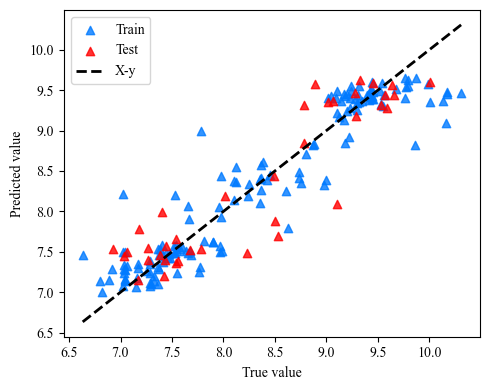

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.offsetbox import TextArea, VPacker, AnnotationBbox

mean_value = 8.347281
std_value = 0.992163

y_train_original = y_train * std_value + mean_value
y_train_pred_original = y_train_pred * std_value + mean_value

y_test_original = y_test * std_value + mean_value
y_pred_original = y_pred * std_value + mean_value

plt.figure(figsize=(5, 4))

plt.scatter(y_train_original, y_train_pred_original, alpha=0.8, label='Train', color='#007AFF', marker='^')
plt.scatter(y_test_original, y_pred_original, alpha=0.8, label='Test', color='r', marker='^')

min_val = min(y_train_original.min(), y_test_original.min())
max_val = max(y_train_original.max(), y_test_original.max())
plt.plot([min_val, max_val], [min_val, max_val], 'k--', lw=2, label='X-y')

plt.xlabel('True value')
plt.ylabel('Predicted value')

plt.legend()

plt.tight_layout()
plt.savefig('Dec_TPA_i.jpg', dpi=600)
plt.show()

In [29]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from skopt import BayesSearchCV
from skopt.space import Real, Integer, Categorical
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import Lasso
import warnings
warnings.filterwarnings('ignore')

df = pd.read_excel("C:\\Users\\30393\\Desktop\\Dec_TPA_scaler.xlsx")

model_features = {
    'RF': ['HI', 'SHP', 'RplusG', 'RI'],
    'SVR': ['HI', 'SHP', 'RplusG', 'RI'],
    'MLP': ['HI', 'RplusG'],
    'XGBoost': ['HI', 'RplusG', 'RI', 'a*'],
    'LightGBM': ['HI', 'SHP', 'RplusG', 'RI'],
}

all_required_features = list(set([f for features in model_features.values() for f in features]))

X = df[all_required_features]
y = df['TPA(mg/g)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

base_models = {
    'RF': {
        'model': RandomForestRegressor(random_state=42),
        'use_scaler': False
    },
    'SVR': {
        'model': SVR(kernel='rbf'),
        'use_scaler': False
    },
    'MLP': {
        'model': MLPRegressor(random_state=42, max_iter=1000),
        'use_scaler': False
    },
    'XGBoost': {
        'model': XGBRegressor(random_state=42, verbosity=0),
        'use_scaler': False
    },
    'LightGBM': {
        'model': LGBMRegressor(random_state=42, verbose=-1),
        'use_scaler': False
    }
}

def generate_oof_predictions(model, X, y, features, n_splits=5):
    oof_preds = np.zeros(len(y))
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)
    
    for train_idx, val_idx in kf.split(X):
        X_train_fold = X.iloc[train_idx][features].values
        y_train_fold = y.iloc[train_idx].values.ravel()
        X_val_fold = X.iloc[val_idx][features].values
        
        model.fit(X_train_fold, y_train_fold)
        oof_preds[val_idx] = model.predict(X_val_fold)
    
    return oof_preds

optimized_models = {}

for name, model_info in base_models.items():
    print(f"\ntrain {name} model (feature: {model_features[name]})...")
    features = model_features[name]
    X_train_subset = X_train[features]
    model = model_info['model']
    model.fit(X_train_subset, y_train)
    optimized_models[name] = {
        'model': model,
        'features': features
    }

meta_features_train = []

for name, model_info in optimized_models.items():
    print(f"being {name} OOF...")
    oof_pred = generate_oof_predictions(
        model_info['model'], 
        X_train, 
        y_train, 
        model_info['features']
    )
    meta_features_train.append(oof_pred.reshape(-1, 1))

meta_features_train = np.hstack(meta_features_train)

meta_model = Lasso(random_state=42)

param_bayes = {
    'alpha': Real(1e-5, 1e2, prior='log-uniform'),
    'fit_intercept': Categorical([True, False]),
    'max_iter': Integer(1000, 5000),
}

bayes_search = BayesSearchCV(
    estimator=meta_model,
    search_spaces=param_bayes,
    n_iter=30,
    cv=5,
    scoring='r2',
    optimizer_kwargs={'n_initial_points': 10},
    n_jobs=-1,
    random_state=42
)

bayes_search.fit(meta_features_train, y_train.values.ravel())
best_meta_model = bayes_search.best_estimator_

print(f"\nmodel-param: {bayes_search.best_params_}")
print(f"model-R2: {bayes_search.best_score_:.4f}")

meta_features_test = []

for name, model_info in optimized_models.items():
    model = model_info['model']
    features = model_info['features']
    model.fit(X_train[features].values, y_train.values.ravel())
    test_pred = model.predict(X_test[features].values).reshape(-1, 1)
    meta_features_test.append(test_pred)

meta_features_test = np.hstack(meta_features_test)

final_pred = best_meta_model.predict(meta_features_test)

test_r2 = r2_score(y_test, final_pred)
test_rmse = np.sqrt(mean_squared_error(y_test, final_pred))
test_mae = mean_absolute_error(y_test, final_pred)

print("\ntest:")
print(f"R2: {test_r2:.4f}")
print(f"RMSE: {test_rmse:.4f}")
print(f"MAE: {test_mae:.4f}")

final_train_pred = best_meta_model.predict(meta_features_train)
train_r2 = r2_score(y_train, final_train_pred)
train_rmse = np.sqrt(mean_squared_error(y_train, final_train_pred))
train_mae = mean_absolute_error(y_train, final_train_pred)

print("\ntrain:")
print(f"R2: {train_r2:.4f}")
print(f"RMSE: {train_rmse:.4f}")
print(f"MAE: {train_mae:.4f}")


train RF model (feature: ['HI', 'SHP', 'RplusG', 'RI'])...

train SVR model (feature: ['HI', 'SHP', 'RplusG', 'RI'])...

train MLP model (feature: ['HI', 'RplusG'])...

train XGBoost model (feature: ['HI', 'RplusG', 'RI', 'a*'])...

train LightGBM model (feature: ['HI', 'SHP', 'RplusG', 'RI'])...
being RF OOF...
being SVR OOF...
being MLP OOF...
being XGBoost OOF...
being LightGBM OOF...

model-param: OrderedDict({'alpha': 0.007425534359037013, 'fit_intercept': False, 'max_iter': 4731})
model-R2: 0.8493

test:
R2: 0.8440
RMSE: 0.3788
MAE: 0.3039

train:
R2: 0.8626
RMSE: 0.3743
MAE: 0.2831


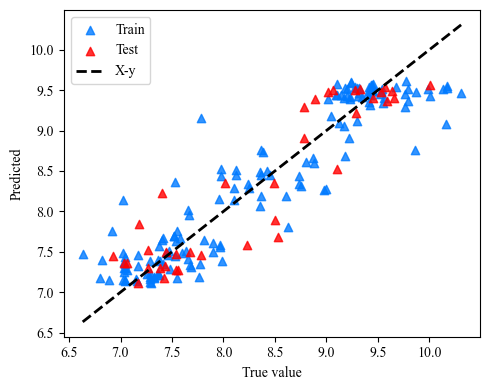

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.offsetbox import TextArea, VPacker, AnnotationBbox

mean_value = 8.347281
std_value = 0.992163

y_train_original = y_train * std_value + mean_value
y_train_pred_original = final_train_pred * std_value + mean_value

y_test_original = y_test * std_value + mean_value
y_pred_original = final_pred * std_value + mean_value

plt.figure(figsize=(5, 4))

plt.scatter(y_train_original, y_train_pred_original, alpha=0.8, label='Train', color='#007AFF', marker='^')
plt.scatter(y_test_original, y_pred_original, alpha=0.8, label='Test', color='r', marker='^')

min_val = min(y_train_original.min(), y_test_original.min())
max_val = max(y_train_original.max(), y_test_original.max())
plt.plot([min_val, max_val], [min_val, max_val], 'k--', lw=2, label='X-y')

plt.xlabel('True value')
plt.ylabel('Predicted')
plt.legend()
plt.tight_layout()
plt.savefig('Dec_TPA_j.jpg', dpi=300)
plt.show()

RF: 0.00
SVR: 0.65
MLP: 0.16
XGBoost: 0.08
LightGBM: 0.00


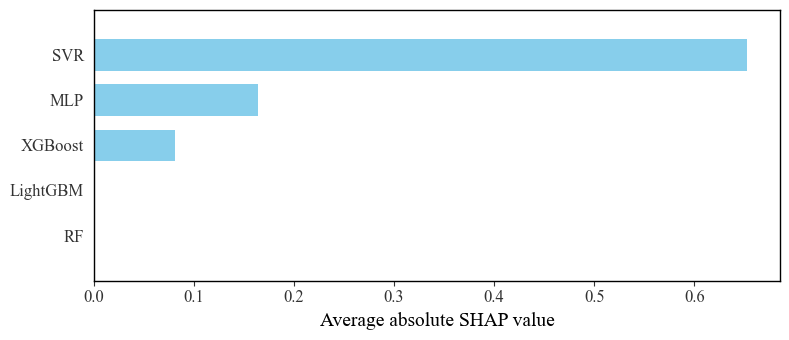

In [31]:
import shap
import matplotlib.pyplot as plt
import numpy as np

base_model_names = ['RF', 'SVR', 'MLP', 'XGBoost', 'LightGBM']

explainer = shap.LinearExplainer(best_meta_model, meta_features_train)
shap_values = explainer.shap_values(meta_features_test)

mean_abs_shap = np.mean(np.abs(shap_values), axis=0)

for model_name, shap_val in zip(base_model_names, mean_abs_shap):
    print(f"{model_name}: {shap_val:.2f}")

shap.summary_plot(
    shap_values, 
    meta_features_test, 
    feature_names=base_model_names,
    plot_type="bar",
    color='skyblue',  
    show=False
)

ax = plt.gca()
for spine in ax.spines.values():
    spine.set_visible(True)
    spine.set_color('black')
    spine.set_linewidth(1)

plt.xlabel("Average absolute SHAP value", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.savefig('Dec_TPA_k.png', dpi=600, bbox_inches='tight')
plt.tight_layout()
plt.show()

  0%|          | 0/151 [00:00<?, ?it/s]

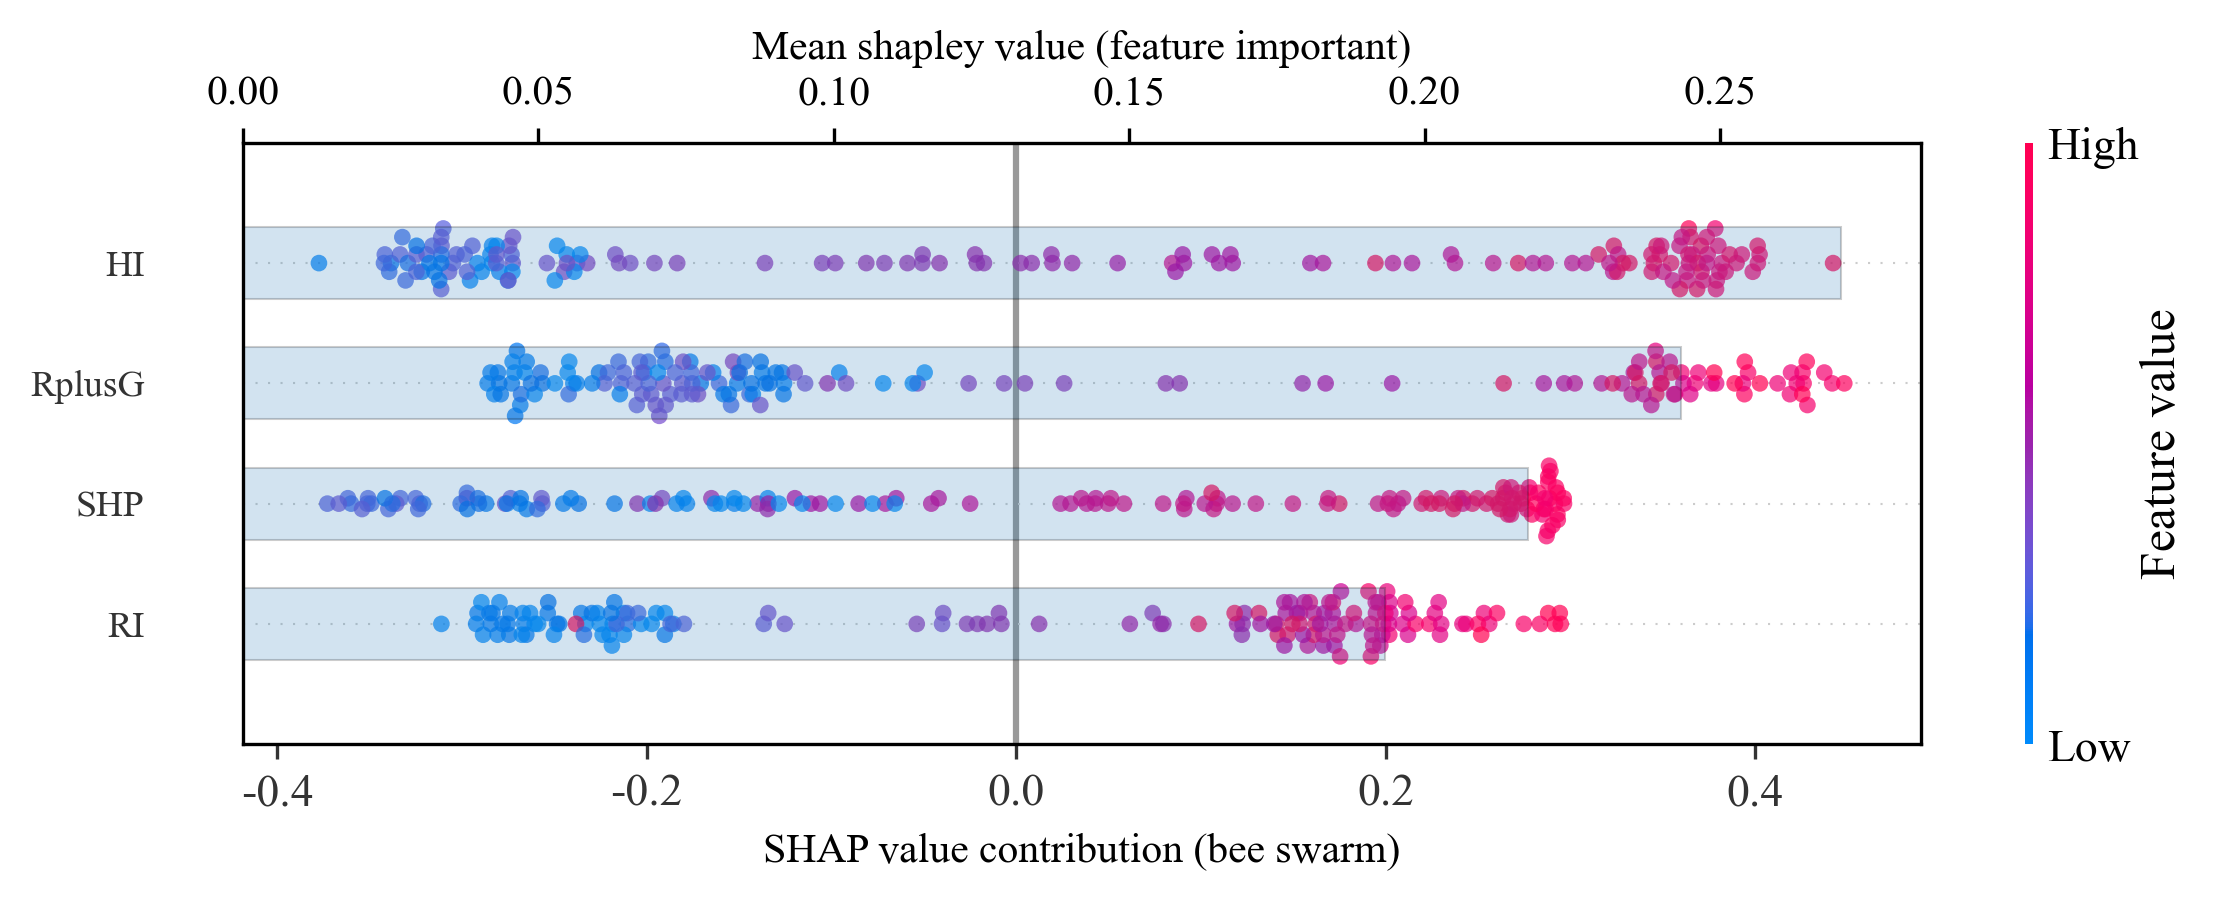

In [32]:
import shap
import matplotlib.pyplot as plt
import numpy as np

svr_model = optimized_models['SVR']['model']
svr_features = model_features['SVR']

X_train_svr = X_train[svr_features]

background_samples = 100
background = shap.sample(X_train_svr, background_samples)

explainer = shap.KernelExplainer(svr_model.predict, background)
shap_values = explainer.shap_values(X_train_svr)

mean_abs_shap = np.mean(np.abs(shap_values), axis=0)
sorted_indices = np.argsort(mean_abs_shap)[::-1]
sorted_features = [svr_features[i] for i in sorted_indices]

sorted_shap_values = shap_values[:, sorted_indices]
sorted_X_train = X_train_svr[sorted_features]
sorted_mean_abs = mean_abs_shap[sorted_indices]

plt.figure(figsize=(12, 8), dpi=300)
plt.rcParams.update({'font.size': 10, 'font.family': 'Times New Roman'})

shap.summary_plot(
    sorted_shap_values,
    sorted_X_train,
    feature_names=sorted_features,
    plot_type="dot",
    show=False,
    sort=False,
    alpha=0.7
)
ax1 = plt.gca()
ax1.set_ylabel('')
ax1.tick_params(axis='y', labelsize=9)
ax1.set_xlabel('SHAP value contribution (bee swarm)', fontsize=10)

ax2 = ax1.twiny()
ax2.grid(False)
ax2.set_ylim(ax1.get_ylim())

y_pos = np.arange(len(sorted_features))[::-1]  
bars = ax2.barh(
    y=y_pos,
    width=sorted_mean_abs,
    height=0.6,
    color='#1f77b4',
    alpha=0.2,
    edgecolor='black',
    linewidth=0.5
)

ax2.set_xlabel('Mean shapley value (feature important)', fontsize=10)
ax2.xaxis.set_label_position('top')
ax2.tick_params(
    axis='x',
    which='both',
    bottom=False,
    labelbottom=False
)
ax2.spines['bottom'].set_visible(False)

plt.tight_layout()
plt.savefig('Dec_TPA_l.png', dpi=600, bbox_inches='tight')
plt.show()

In [33]:
print("\nFeature importance (mean absolute SHAP value):")
mean_abs_shap = np.mean(np.abs(shap_values), axis=0)
for i, feature in enumerate(svr_features):
    print(f"{feature}: {mean_abs_shap[i]:.4f}")


Feature importance (mean absolute SHAP value):
HI: 0.2704
SHP: 0.2176
RplusG: 0.2435
RI: 0.1934
